In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns

Training Image Preprocessing 

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation image preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Building model

In [4]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [5]:
model=Sequential()

In [6]:
## Building Convolution layer

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\Nitin\Documents\Plant disease prediction\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

Compiling model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [19]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1774s 807ms/step - accuracy: 0.3910 - loss: 2.1592 - val_accuracy: 0.8307 - val_loss: 0.5440
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1784s 812ms/step - accuracy: 0.8399 - loss: 0.5153 - val_accuracy: 0.9150 - val_loss: 0.2597
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1784s 812ms/step - accuracy: 0.9082 - loss: 0.2873 - val_accuracy: 0.9328 - val_loss: 0.2065
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1774s 807ms/step - accuracy: 0.9345 - loss: 0.1975 - val_accuracy: 0.9502 - val_loss: 0.1544
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1838s 837ms/step - accuracy: 0.9541 - loss: 0.1414 - val_accuracy: 0.9570 - val_loss: 0.1359
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1747s 795ms/step - accuracy: 0.9655 - loss: 0.1058 - val_accuracy: 0.9412 - val_loss: 0.1912
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1749s 796ms/step - accuracy: 0.9708 - loss: 0.0913 - val_accuracy: 0.9619 - val_loss: 0.1216
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1753s 798ms/s

Model Evaluation

In [20]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 582s 265ms/step - accuracy: 0.9893 - loss: 0.0315


In [21]:
print(train_loss,train_acc)

0.02816147543489933 0.9906821250915527


In [22]:
val_loss,val_acc =model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 148s 268ms/step - accuracy: 0.9688 - loss: 0.1151


In [23]:
print(val_loss,val_acc)

0.11122691631317139 0.9681880474090576


Saving model

In [24]:
model.save("trained_model_1.h5")

In [57]:
model.save("trained_model_2.keras")

In [26]:
training_history.history


{'accuracy': [0.5898997187614441,
  0.8602461218833923,
  0.9171633720397949,
  0.941973090171814,
  0.9564691781997681,
  0.965843915939331,
  0.9718614220619202,
  0.977580189704895,
  0.9797993898391724,
  0.9826445579528809],
 'loss': [1.3892643451690674,
  0.443782776594162,
  0.25792238116264343,
  0.17789925634860992,
  0.1329120695590973,
  0.10346165299415588,
  0.0861717239022255,
  0.06964544951915741,
  0.06266739219427109,
  0.054822903126478195],
 'val_accuracy': [0.8306965827941895,
  0.9149783849716187,
  0.9327908158302307,
  0.9502048492431641,
  0.9570339322090149,
  0.9411563873291016,
  0.9619280695915222,
  0.9590826034545898,
  0.9688140153884888,
  0.9681880474090576],
 'val_loss': [0.5440495014190674,
  0.2597474753856659,
  0.2065284550189972,
  0.15436136722564697,
  0.13591676950454712,
  0.19124649465084076,
  0.12156906723976135,
  0.13739635050296783,
  0.09947190433740616,
  0.11122692376375198]}

In [27]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

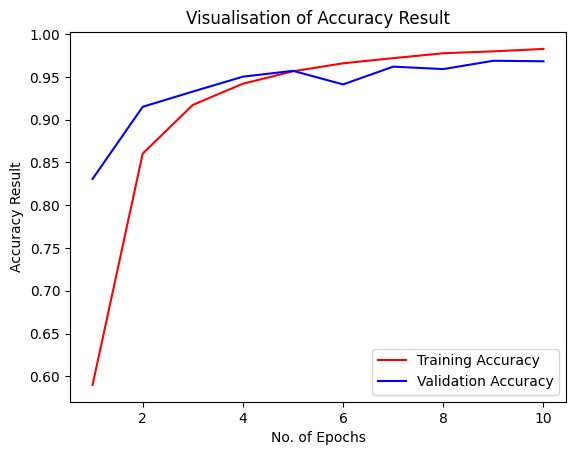

In [28]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualisation of Accuracy Result")
plt.legend()
plt.show()

Some other metrics for model evaluation

In [30]:
class_names= validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [31]:
test_set=validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred =model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 127s 231ms/step


(array([[9.9974257e-01, 1.2648628e-05, 2.3215021e-08, ..., 1.2306219e-11,
         7.7843607e-11, 1.3556753e-09],
        [9.9856275e-01, 7.0976204e-04, 6.3203282e-07, ..., 2.2121947e-08,
         1.6190750e-08, 5.5929970e-08],
        [9.9999976e-01, 4.3406036e-08, 3.6945825e-11, ..., 1.0287955e-15,
         1.5576073e-12, 3.3160452e-10],
        ...,
        [8.0020832e-20, 2.1958525e-25, 1.3709613e-18, ..., 4.7197456e-21,
         1.7893928e-20, 1.0000000e+00],
        [1.9209284e-16, 2.3116998e-21, 4.5879672e-16, ..., 1.5826998e-17,
         4.4724451e-17, 1.0000000e+00],
        [1.2772387e-17, 5.3164252e-19, 3.5725795e-17, ..., 6.2384804e-18,
         4.8935846e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [34]:
predicted_categories =tf.argmax(y_pred,axis=1)

In [35]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [36]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [37]:
y_true =tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

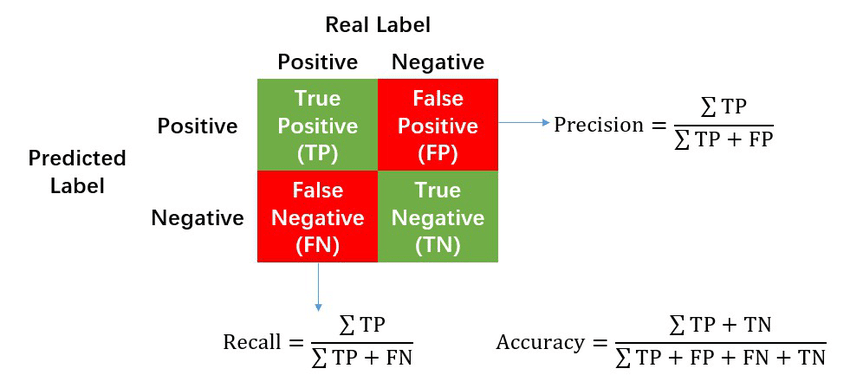

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.91      0.95       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.95      0.98      0.97       502
                               Blueberry___healthy       1.00      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.98      0.90       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.82      0.

In [45]:
cm=confusion_matrix(y_true,predicted_categories)
cm.shape
cm

array([[460,   6,   0, ...,   0,   1,   0],
       [  0, 489,   0, ...,   0,   0,   0],
       [  0,   0, 437, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 443,   0],
       [  0,   0,   1, ...,   0,   0, 479]])

Confusion MAtrix Visualisation

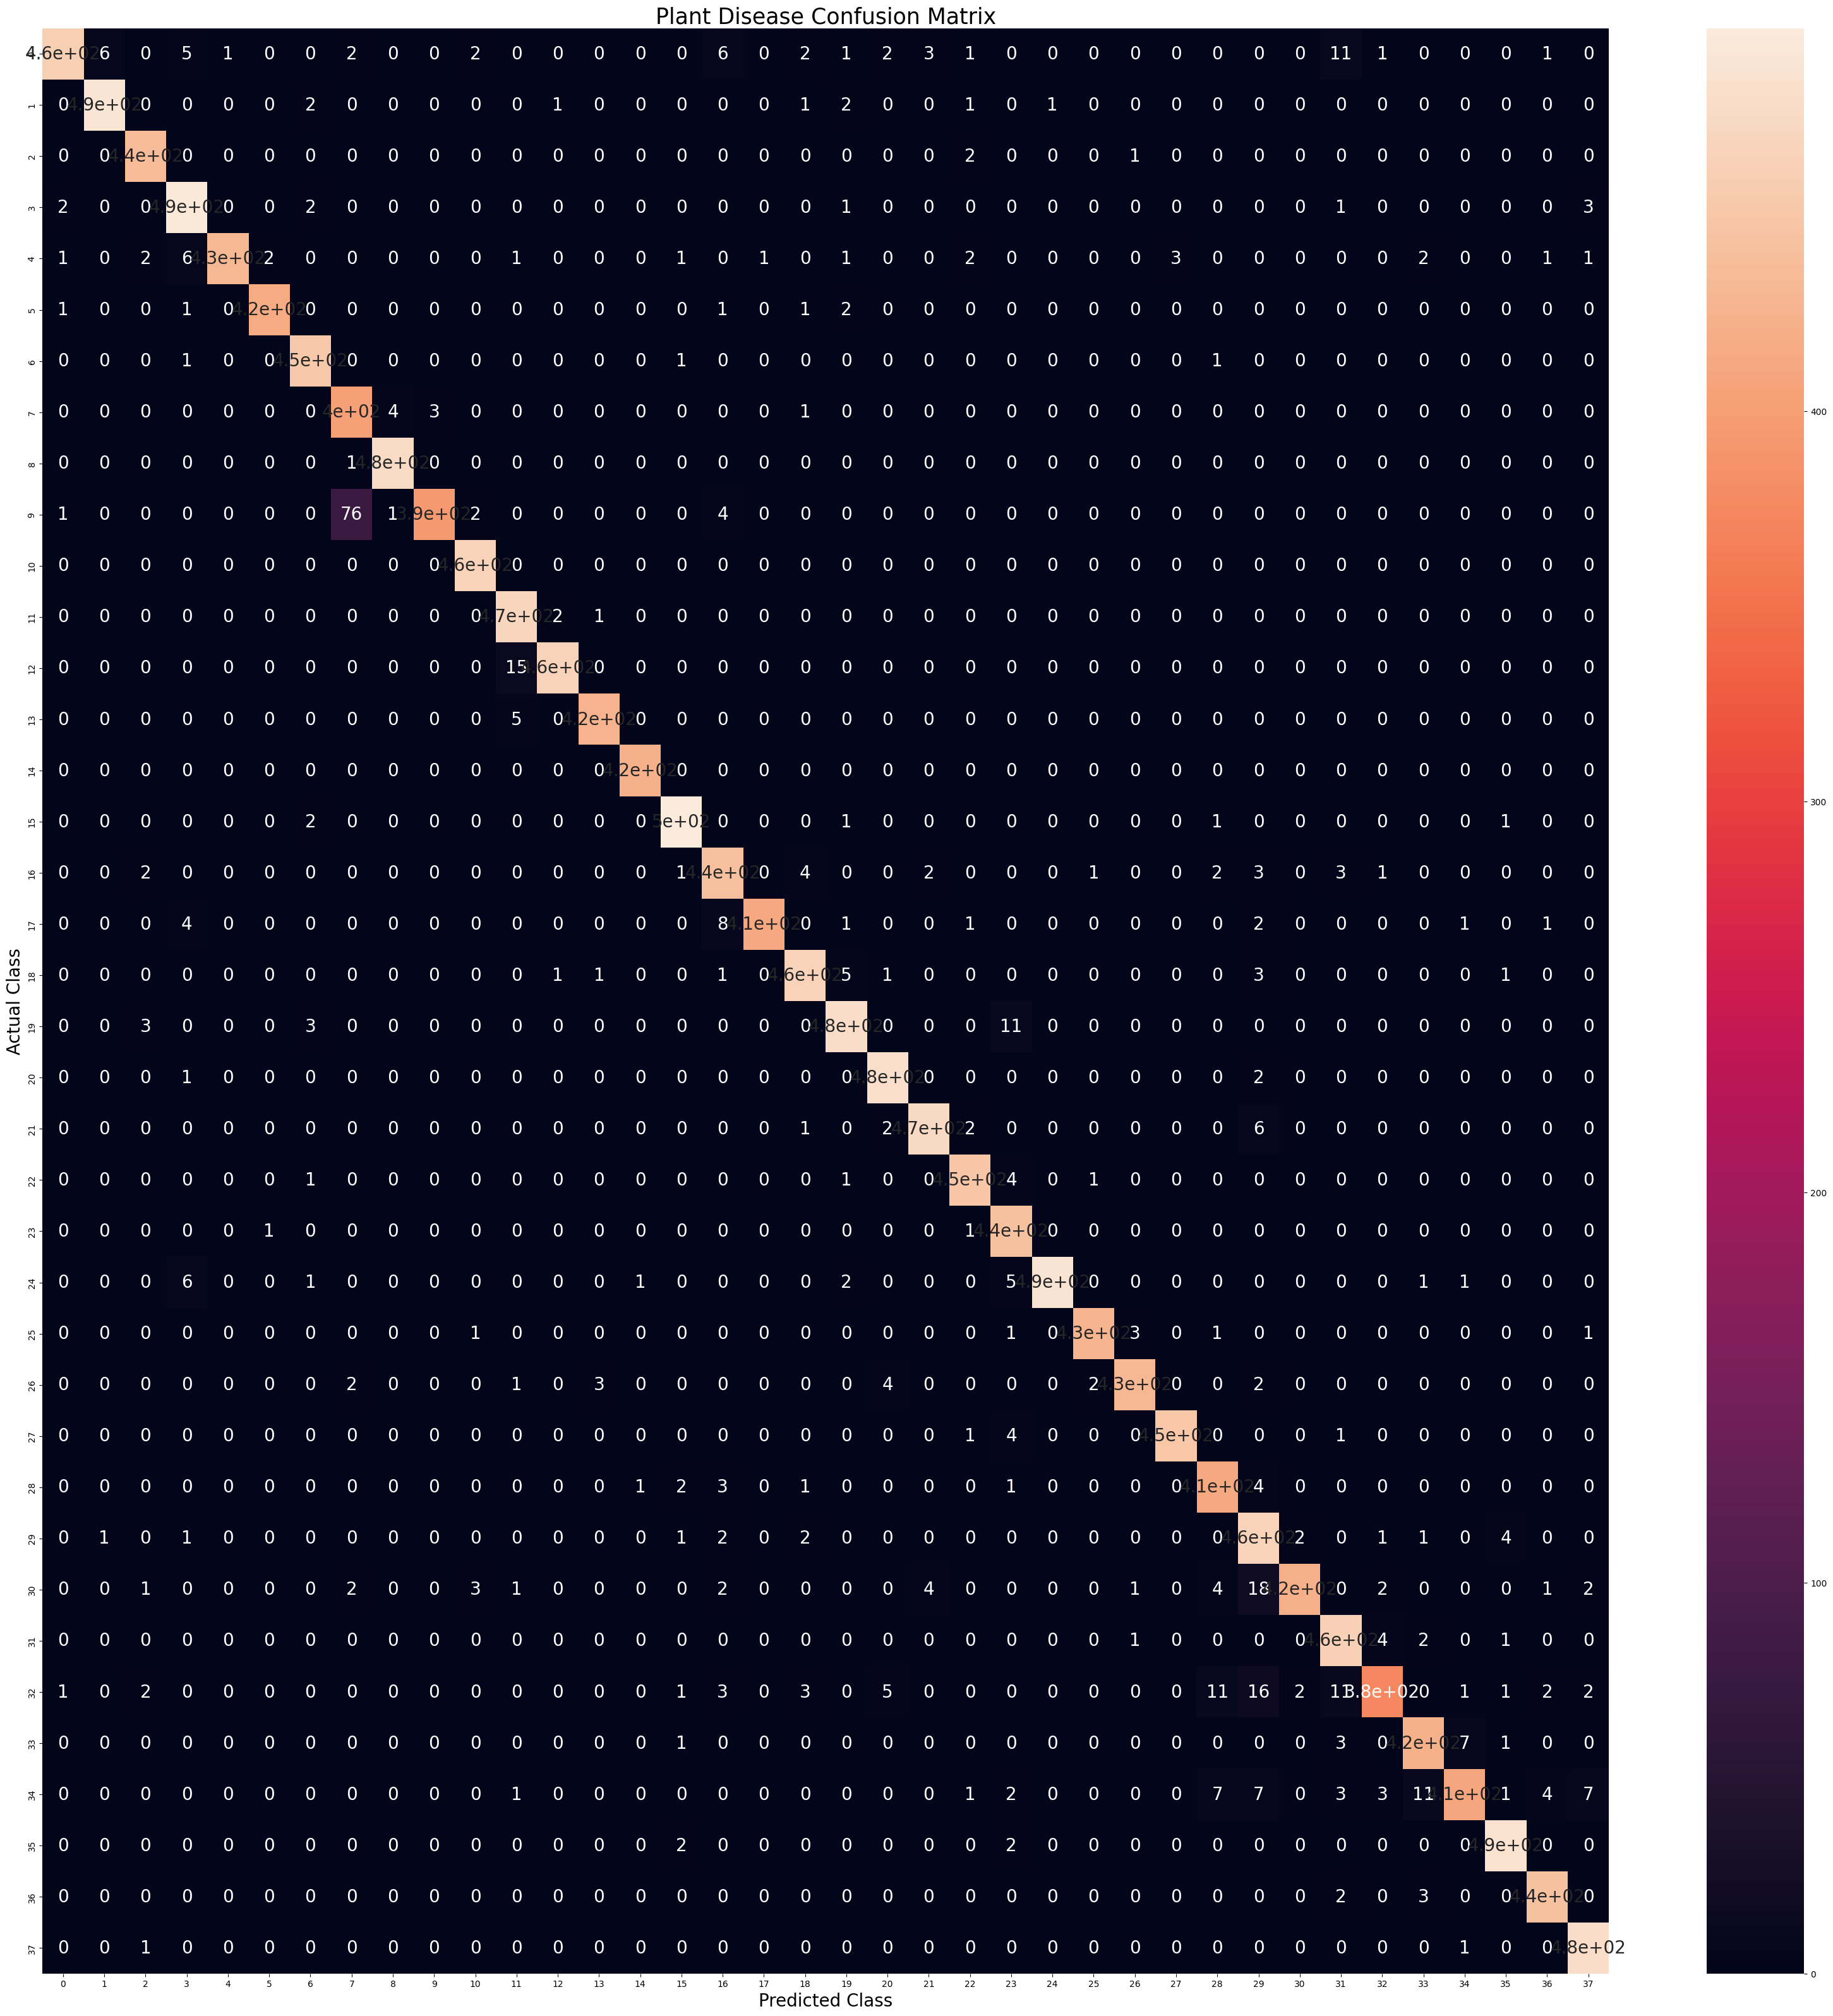

In [56]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':20})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Confusion Matrix",fontsize=25)
plt.show()